In [ ]:
# HYPOTHESIS TESTING

In [ ]:
# Hypothesis 3:
# A male author is more productive than a female author.

In [1]:
# >>> Preparation
# Import categorized 'names_cat.csv'
import pandas

print("Importing names... ")
names = pandas.read_csv("data/names_cat_i3.csv", usecols=["name", "n_publs", "likely_gender", "score", "n_contribs"])

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
names = names.set_index("name", drop = False)
print("Names imported. They look like this: {}".format(names[:5]))

Importing names... 
Names imported. They look like this:                                         name likely_gender  n_publs  score  \
name                                                                         
'Maseka Lesaoana            'Maseka Lesaoana        female        2      8   
(David) Jing Dai            (David) Jing Dai          male        1      7   
(Max) Zong-Ming Cheng  (Max) Zong-Ming Cheng          male        2      8   
(Sophy) Shu-Jiun Chen  (Sophy) Shu-Jiun Chen        female        2      7   
(Zhou) Bryan Bai            (Zhou) Bryan Bai          male        2      6   

                       n_contribs  
name                               
'Maseka Lesaoana         0.583333  
(David) Jing Dai         0.200000  
(Max) Zong-Ming Cheng    0.297619  
(Sophy) Shu-Jiun Chen    0.642857  
(Zhou) Bryan Bai         1.000000  


In [2]:
print("Importing publications... ")
cols = [
    'key', 
    'pub_cat',
    'pub_type',
    'title',
    'year',
    'authors',
    'n_authors',
    'n_males',
    'n_females',
    'n_unknown',
    'ratio',
    'n_contribs_females',
    'n_contribs_males',
    'n_contribs_unknown'
]

publs = pandas.read_csv("data/publications_cor3.csv", usecols=cols)

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
publs = publs.set_index("key", drop = False)
print("Publications imported. They look like this: {}".format(publs[:5]))

Importing publications... 


C:\Program_Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Publications imported. They look like this:                                                                  key  \
key                                                                    
books/acm/0082477                                  books/acm/0082477   
books/acm/Kim95                                      books/acm/Kim95   
books/acm/kim95/AnnevelinkACFHK95  books/acm/kim95/AnnevelinkACFHK95   
books/acm/kim95/Blakeley95                books/acm/kim95/Blakeley95   
books/acm/kim95/BreitbartGS95          books/acm/kim95/BreitbartGS95   

                                        pub_cat pub_type  \
key                                                        
books/acm/0082477                          book      NaN   
books/acm/Kim95                            book      NaN   
books/acm/kim95/AnnevelinkACFHK95  incollection      NaN   
books/acm/kim95/Blakeley95         incollection      NaN   
books/acm/kim95/BreitbartGS95      incollection      NaN   

                              

In [ ]:
# >>> Testing
# A male author is more productive than a female author.

In [3]:
from statistics import mode
import numpy
import matplotlib.pyplot as plt

In [ ]:
'''
On average, an author contributes to: mean=6.139819233233704, median=2.0 and mode=1 publications
On average, an author of unknown gender contributes to: mean=5.371090264478818, median=1.0 and mode=1 publications
On average, a female author contributes to: mean=4.113843465235301, median=1 and mode=1 publications
On average, a male author contributes to: mean=6.402508908684967, median=2 and mode=1 publications
On average, a male author contributes to 1.5563326516408327 times more publications
'''

In [4]:
# Relative values
# Single Contributions
# Finding the mode of a series: https://stackoverflow.com/questions/10797819/finding-the-mode-of-a-list
from statistics import mode

names_max = names[names['score'] >= 5]

n_contribs_mean = names["n_contribs"].mean()
n_contribs_median = numpy.median(names["n_contribs"]) # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.median.html
n_contribs_mode = mode(names["n_contribs"])

n_contribs_mean_by_gender = names_max.groupby("likely_gender").agg({'n_contribs':'mean'}) # Mean by gender
n_contribs_mean_by_gender["likely_gender"] = n_contribs_mean_by_gender.index.values

n_contribs_median_by_gender = names_max.groupby("likely_gender").agg({'n_contribs':'median'}) # Median by gender
n_contribs_median_by_gender["likely_gender"] = n_contribs_median_by_gender.index.values

n_contribs_mode_by_gender = names_max.groupby("likely_gender").agg({'n_contribs': mode}) # Mode by gender
n_contribs_mode_by_gender["likely_gender"] = n_contribs_mode_by_gender.index.values

n_contribs_f_mean = n_contribs_mean_by_gender["n_contribs"]["female"]
n_contribs_f_median = n_contribs_median_by_gender["n_contribs"]["female"]
n_contribs_f_mode = n_contribs_mode_by_gender["n_contribs"]["female"]

n_contribs_m_mean = n_contribs_mean_by_gender["n_contribs"]["male"]
n_contribs_m_median = n_contribs_median_by_gender["n_contribs"]["male"]
n_contribs_m_mode = n_contribs_mode_by_gender["n_contribs"]["male"]

n_contribs_u_mean = names[names["score"]<5]["n_contribs"].mean() # mean for unknown authors
n_contribs_u_median = names[names["score"]<5]["n_contribs"].median() # median for male authors
n_contribs_u_mode = mode(names[names["score"]<5]["n_contribs"]) # mode for male authors

contribs_fmax = names[(names["likely_gender"] == "female") | (names["score"]<5)]

n_contribs_fmax_mean = contribs_fmax["n_contribs"].mean()
n_contribs_fmax_median = contribs_fmax["n_contribs"].median()
n_contribs_fmax_mode = mode(contribs_fmax["n_contribs"])

print("On average, an author of unknown gender makes: mean={}, median={} and mode={} contributions".format(n_contribs_u_mean, n_contribs_u_median, n_contribs_u_mode))
print("On average, a female author makes: mean={}, median={} and mode={} contributions".format(n_contribs_f_mean, n_contribs_f_median, n_contribs_f_mode))
print("On average, a male author makes: mean={}, median={} and mode={} contributions".format(n_contribs_m_mean, n_contribs_m_median, n_contribs_m_mode))
print("On average, a potentially female author makes: mean={}, median={} and mode={} contributions".format(n_contribs_fmax_mean, n_contribs_fmax_median, n_contribs_fmax_mode))
'''
On average, an author of unknown gender makes: mean=1.701409414493561, median=0.5 and mode=0.3333333333333333 contributions
On average, a female author makes: mean=1.3841903867560146, median=0.5 and mode=0.3333333333333333 contributions
On average, a male author makes: mean=2.239408609184296, median=0.5428571428571429 and mode=0.3333333333333333 contributions
On average, a potentially female author makes: mean=1.663108894471549, median=0.5 and mode=0.3333333333333333 contributions

'''

On average, an author of unknown gender makes: mean=1.701409414493561, median=0.5 and mode=0.3333333333333333 contributions
On average, a female author makes: mean=1.3841903867560146, median=0.5 and mode=0.3333333333333333 contributions
On average, a male author makes: mean=2.239408609184296, median=0.5428571428571429 and mode=0.3333333333333333 contributions
On average, a potentially female author makes: mean=1.663108894471549, median=0.5 and mode=0.3333333333333333 contributions


'\nOn average, an author of unknown gender makes: mean=1.701409414493561, median=0.5 and mode=0.3333333333333333 contributions\nOn average, a female author makes: mean=1.3841903867560146, median=0.5 and mode=0.3333333333333333 contributions\nOn average, a male author makes: mean=2.239408609184296, median=0.5428571428571429 and mode=0.3333333333333333 contributions\nOn average, a potentially female author makes: mean=1.663108894471549, median=0.5 and mode=0.3333333333333333 contributions\n\n'

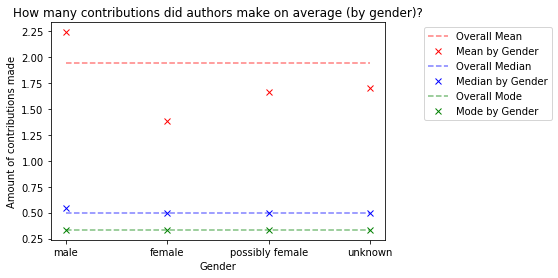

In [5]:
# >>> Visualization
# Outliers Included
plt_mean = plt.plot(['male', 'female', 'possibly female', 'unknown'], [n_contribs_mean, n_contribs_mean, n_contribs_mean, n_contribs_mean], 'r--', alpha=0.5, label='Overall Mean')
plt_g_mean = plt.plot(['male','female', 'possibly female', 'unknown'], [n_contribs_m_mean, n_contribs_f_mean, n_contribs_fmax_mean, n_contribs_u_mean], 'rx', label='Mean by Gender')

plt_median = plt.plot(['male', 'female', 'possibly female', 'unknown'],[n_contribs_median, n_contribs_median, n_contribs_median, n_contribs_median], 'b--', alpha=0.5, label='Overall Median')
plt_g_median = plt.plot(['male', 'female', 'possibly female', 'unknown'],[n_contribs_m_median, n_contribs_f_median, n_contribs_fmax_median, n_contribs_u_median], 'bx', label='Median by Gender')

plt_mode = plt.plot(['male', 'female', 'possibly female', 'unknown'],[n_contribs_mode, n_contribs_mode, n_contribs_mode, n_contribs_mode], 'g--', alpha=0.5, label='Overall Mode')
plt_g_mode = plt.plot(['male', 'female', 'possibly female', 'unknown'],[n_contribs_m_mode, n_contribs_f_mode, n_contribs_fmax_mode, n_contribs_u_mode], 'gx', label='Mode by Gender')


plt.xlabel('Gender')
plt.ylabel('Amount of contributions made')

plt.title("How many contributions did authors make on average (by gender)?")

plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()

In [6]:
# >>> See how outliers influence the result
# Outlier calculation
print("Calculating from what point on a team is an outlier, considering its size...")
import numpy as np
lower = np.percentile(names["n_contribs"], 25)
higher = np.percentile(names["n_contribs"], 75)
interquart_range = higher - lower
outer_fence = higher + interquart_range * 3
print("The outer fence is {}".format(outer_fence))

Calculating from what point on a team is an outlier, considering its size...
The outer fence is 4.554761904761904


In [7]:
regular_authors = names[names["n_contribs"] <= outer_fence]
regular_authors_max = regular_authors[regular_authors["score"] >= 5]

In [8]:
n_contribs_mean = regular_authors["n_contribs"].mean()
n_contribs_median = np.median(regular_authors["n_contribs"]) # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.median.html
n_contribs_mode = mode(regular_authors["n_contribs"])

n_contribs_mean_by_gender = regular_authors_max.groupby("likely_gender").agg({'n_contribs':'mean'}) # Mean by gender
n_contribs_mean_by_gender["likely_gender"] = n_contribs_mean_by_gender.index.values

n_contribs_median_by_gender = regular_authors_max.groupby("likely_gender").agg({'n_contribs':'median'}) # Median by gender
n_contribs_median_by_gender["likely_gender"] = n_contribs_median_by_gender.index.values

n_contribs_mode_by_gender = regular_authors_max.groupby("likely_gender").agg({'n_contribs': mode}) # Mode by gender
n_contribs_mode_by_gender["likely_gender"] = n_contribs_mode_by_gender.index.values

n_contribs_f_mean = n_contribs_mean_by_gender["n_contribs"]["female"]
n_contribs_f_median = n_contribs_median_by_gender["n_contribs"]["female"]
n_contribs_f_mode = n_contribs_mode_by_gender["n_contribs"]["female"]

n_contribs_m_mean = n_contribs_mean_by_gender["n_contribs"]["male"]
n_contribs_m_median = n_contribs_median_by_gender["n_contribs"]["male"]
n_contribs_m_mode = n_contribs_mode_by_gender["n_contribs"]["male"]

n_contribs_u_mean = regular_authors[regular_authors["score"]<5]["n_contribs"].mean() # mean for unknown authors
n_contribs_u_median = regular_authors[regular_authors["score"]<5]["n_contribs"].median() # median for male authors
n_contribs_u_mode = mode(regular_authors[regular_authors["score"]<5]["n_contribs"]) # mode for male authors

contribs_fmax = regular_authors[(regular_authors["likely_gender"] == "female") | (regular_authors["score"]<5)]

n_contribs_fmax_mean = contribs_fmax["n_contribs"].mean()
n_contribs_fmax_median = contribs_fmax["n_contribs"].median()
n_contribs_fmax_mode = mode(contribs_fmax["n_contribs"])

print("On average, an author of unknown gender makes: mean={}, median={} and mode={} contributions".format(n_contribs_u_mean, n_contribs_u_median, n_contribs_u_mode))
print("On average, a female author makes: mean={}, median={} and mode={} contributions".format(n_contribs_f_mean, n_contribs_f_median, n_contribs_f_mode))
print("On average, a male author makes: mean={}, median={} and mode={} contributions".format(n_contribs_m_mean, n_contribs_m_median, n_contribs_m_mode))
print("On average, a potentially female author makes: mean={}, median={} and mode={} contributions".format(n_contribs_fmax_mean, n_contribs_fmax_median, n_contribs_fmax_mode))

'''
On average, an author of unknown gender makes: mean=0.7531417121859828, median=0.45 and mode=0.3333333333333333 contributions
On average, a female author makes: mean=0.7289518925650421, median=0.4166666666666666 and mode=0.3333333333333333 contributions
On average, a male author makes: mean=0.8831775973120519, median=0.5 and mode=0.3333333333333333 contributions
On average, a potentially female author makes: mean=0.7501832072327901, median=0.45 and mode=0.3333333333333333 contributions'''

On average, an author of unknown gender makes: mean=0.7531417121859828, median=0.45 and mode=0.3333333333333333 contributions
On average, a female author makes: mean=0.7289518925650421, median=0.4166666666666666 and mode=0.3333333333333333 contributions
On average, a male author makes: mean=0.8831775973120519, median=0.5 and mode=0.3333333333333333 contributions
On average, a potentially female author makes: mean=0.7501832072327901, median=0.45 and mode=0.3333333333333333 contributions


'\nOn average, an author of unknown gender makes: mean=0.7531417121859828, median=0.45 and mode=0.3333333333333333 contributions\nOn average, a female author makes: mean=0.7289518925650421, median=0.4166666666666666 and mode=0.3333333333333333 contributions\nOn average, a male author makes: mean=0.8831775973120519, median=0.5 and mode=0.3333333333333333 contributions\nOn average, a potentially female author makes: mean=0.7501832072327901, median=0.45 and mode=0.3333333333333333 contributions'

likely_gender
female    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
male      [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

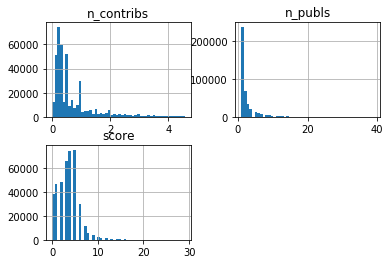

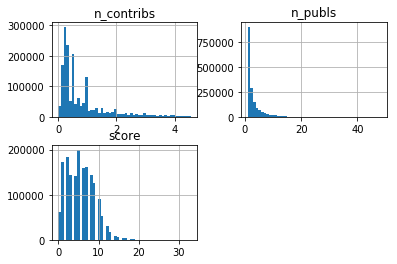

In [244]:
regular_authors.groupby("likely_gender").hist(bins=50)

In [9]:
from scipy.stats import skew
f = regular_authors[regular_authors["likely_gender"] == "female"]["n_contribs"]
m = regular_authors[regular_authors["likely_gender"] == "male"]["n_contribs"]

In [10]:
skew(f)

2.239523776573972

In [11]:
skew(m)

1.9773100008576092

In [33]:
from scipy.stats import mannwhitneyu
# Ranking not necessary, is done by SciPy.
U = mannwhitneyu(f, m, alternative="two-sided")[0]
# U for m: 325 564 646 584.5
# U for f: 376 554 747 123.5

In [34]:
mannwhitneyu(f, m, alternative="two-sided")

MannwhitneyuResult(statistic=325564646584.5, pvalue=0.0)

In [35]:
# NOT SURE WHAT I NEED THIS FOR
'''
https://en.wikipedia.org/wiki/Standard_score
In statistics, the standard score is the signed fractional number of standard deviations by which the value of a
n observation or data point is above the mean value of what is being observed or measured. Observed values above 
the mean have positive standard scores, while values below the mean have negative standard scores. 
'''
from scipy import stats

def calc_tie_cor(arr, n):
    # Because there are expected to be tied ranks, in order to calculate z, we need to do a correction calculation
    # https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test#Calculations
    ranks = stats.rankdata(arr) # https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.rankdata.html
    
    unique, counts = numpy.unique(ranks, return_counts=True)
    counts = dict(zip(unique, counts))
    
    s = 0
    dividor = n * (n - 1)
    
    for i in unique:
        t = counts[i] # amount of observations with this rank https://stackoverflow.com/questions/21866625/counting-occurrences-of-items-in-an-array-python
        portion = (t**3 - t) / dividor # to the power of 3: https://stackoverflow.com/questions/12043913/python-and-powers-math
        s = s + portion
    return s

import math
# Calculate Z
# https://en.wikipedia.org/wiki/Standard_score
n_1 = len(f)
n_2 = len(m)
n = n_1 + n_2
m_U = (n_1 * n_2) / 2 # mean of U
tie_cor = calc_tie_cor(regular_authors["n_contribs"].values, n)
o_corr = math.sqrt((n_1*n_2 / 12)*((n+1)-tie_cor)) # Standard deviation of U
z = (U - m_U) / o_corr
z

106, 53.5
11, 112.0
238, 236.5
1, 356.0
86, 399.5
55, 470.0
15, 505.0
10, 517.5
31, 538.0
1, 554.0
14, 561.5
75, 606.0
56, 671.5
24, 711.5
73, 760.0
9, 801.0
69, 840.0
2, 875.5
23, 888.0
38, 918.5
12, 943.5
1, 950.0
119, 1010.0
2, 1070.5
57, 1100.0
35, 1146.0
81, 1204.0
10, 1249.5
25, 1267.0
6, 1282.5
63, 1317.0
1, 1349.0
10, 1354.5
36, 1377.5
85, 1438.0
36, 1498.5
7, 1520.0
99, 1573.0
32, 1638.5
46, 1677.5
35, 1718.0
13, 1742.0
66, 1781.5
42, 1835.5
51, 1882.0
1, 1908.0
2, 1909.5
62, 1941.5
110, 2027.5
1, 2083.0
116, 2141.5
78, 2238.5
103, 2329.0
99, 2430.0
1, 2480.0
2, 2481.5
147, 2556.0
1, 2630.0
62, 2661.5
3, 2694.0
135, 2763.0
147, 2904.0
142, 3048.5
1, 3120.0
90, 3165.5
37, 3229.0
167, 3331.0
195, 3512.0
121, 3670.0
1, 3731.0
145, 3804.0
272, 4012.5
10, 4153.5
326, 4321.5
6, 4487.5
2, 4491.5
252, 4618.5
3, 4746.0
2, 4748.5
283, 4891.0
2, 5033.5
249, 5159.0
6, 5286.5
3, 5291.0
301, 5443.0
17, 5602.0
1, 5611.0
3, 5613.0
3, 5616.0
381, 5808.0
2, 5999.5
2, 6001.5
3, 6004.0
3, 6007.0


1, 634006.0
1, 634007.0
6, 634010.5
3, 634015.0
1, 634017.0
1, 634018.0
1, 634019.0
1, 634020.0
3, 634022.0
1, 634024.0
17, 634033.0
2, 634042.5
1, 634044.0
1, 634045.0
1, 634046.0
1, 634047.0
1, 634048.0
1, 634049.0
1, 634050.0
3, 634052.0
6, 634056.5
1, 634060.0
1, 634061.0
1, 634062.0
1, 634063.0
54, 634090.5
1, 634118.0
2, 634119.5
1, 634121.0
1, 634122.0
7, 634126.0
2, 634130.5
1, 634132.0
3, 634134.0
1, 634136.0
1, 634137.0
1, 634138.0
2, 634139.5
1, 634141.0
1, 634142.0
1, 634143.0
13, 634150.0
1, 634157.0
1331, 634823.0
5, 635491.0
2, 635494.5
1, 635496.0
3, 635498.0
1, 635500.0
1, 635501.0
3, 635503.0
2, 635505.5
6, 635509.5
19, 635522.0
1, 635532.0
2, 635533.5
1, 635535.0
1, 635536.0
1, 635537.0
79, 635577.0
1, 635617.0
2, 635618.5
1, 635620.0
1, 635621.0
2, 635622.5
1, 635624.0
1, 635625.0
1, 635626.0
1, 635627.0
1, 635628.0
2, 635629.5
1, 635631.0
6, 635634.5
1, 635638.0
1, 635639.0
1, 635640.0
3, 635642.0
1, 635644.0
524, 635906.5
2, 636169.5
1, 636171.0
1, 636172.0
2, 636

1, 946590.0
2, 946591.5
3, 946594.0
1, 946596.0
1, 946597.0
1, 946598.0
3, 946600.0
1, 946602.0
1, 946603.0
1, 946604.0
177, 946693.0
1, 946782.0
2, 946783.5
1, 946785.0
1, 946786.0
1, 946787.0
1, 946788.0
1, 946789.0
2, 946790.5
1, 946792.0
2, 946793.5
1, 946795.0
1, 946796.0
2, 946797.5
1, 946799.0
1, 946800.0
2, 946801.5
2, 946803.5
6, 946807.5
1, 946811.0
1, 946812.0
1, 946813.0
1, 946814.0
4, 946816.5
7, 946822.0
9, 946830.0
1, 946835.0
1, 946836.0
1, 946837.0
1, 946838.0
1, 946839.0
3, 946841.0
1, 946843.0
1, 946844.0
1, 946845.0
2, 946846.5
2, 946848.5
2, 946850.5
5, 946854.0
1, 946857.0
1, 946858.0
1, 946859.0
1, 946860.0
1, 946861.0
1, 946862.0
1, 946863.0
1, 946864.0
14824, 954276.5
1, 961689.0
2, 961690.5
43, 961713.0
32, 961750.5
1, 961767.0
1, 961768.0
1, 961769.0
1, 961770.0
1, 961771.0
1, 961772.0
1, 961773.0
2, 961774.5
2, 961776.5
2, 961778.5
1, 961780.0
1, 961781.0
1, 961782.0
6, 961785.5
2, 961789.5
1, 961791.0
24, 961803.5
1, 961816.0
24, 961828.5
31, 961856.0
2, 96

1, 1240781.0
1, 1240782.0
1, 1240783.0
7, 1240787.0
2, 1240791.5
1, 1240793.0
4, 1240795.5
475, 1241035.0
1, 1241273.0
1, 1241274.0
1, 1241275.0
1, 1241276.0
3, 1241278.0
15, 1241287.0
8, 1241298.5
3, 1241304.0
1, 1241306.0
2, 1241307.5
3, 1241310.0
1, 1241312.0
1, 1241313.0
5, 1241316.0
5, 1241321.0
1, 1241324.0
7, 1241328.0
1, 1241332.0
1, 1241333.0
2, 1241334.5
2, 1241336.5
1, 1241338.0
1, 1241339.0
57, 1241368.0
6, 1241399.5
3, 1241404.0
3, 1241407.0
1, 1241409.0
1, 1241410.0
1, 1241411.0
1, 1241412.0
1, 1241413.0
1, 1241414.0
107, 1241468.0
185, 1241614.0
1, 1241707.0
1, 1241708.0
2, 1241709.5
1, 1241711.0
1, 1241712.0
1, 1241713.0
3, 1241715.0
16, 1241724.5
3, 1241734.0
1, 1241736.0
1, 1241737.0
1, 1241738.0
4, 1241740.5
1, 1241743.0
3, 1241745.0
3, 1241748.0
1, 1241750.0
2, 1241751.5
1, 1241753.0
1, 1241754.0
1, 1241755.0
1, 1241756.0
1, 1241757.0
3, 1241759.0
1, 1241761.0
1, 1241762.0
7, 1241766.0
1, 1241770.0
2, 1241771.5
1, 1241773.0
1, 1241774.0
17, 1241783.0
1, 1241792.0
1,

1, 1364544.0
1, 1364545.0
4, 1364547.5
1, 1364550.0
1, 1364551.0
1, 1364552.0
1, 1364553.0
1, 1364554.0
1, 1364555.0
1, 1364556.0
1, 1364557.0
1, 1364558.0
9, 1364563.0
21, 1364578.0
48, 1364612.5
1, 1364637.0
1, 1364638.0
1, 1364639.0
1, 1364640.0
1, 1364641.0
2, 1364642.5
1, 1364644.0
1, 1364645.0
8, 1364649.5
12, 1364659.5
1, 1364666.0
1, 1364667.0
1, 1364668.0
1, 1364669.0
3, 1364671.0
1, 1364673.0
1, 1364674.0
3, 1364676.0
47, 1364701.0
1, 1364725.0
1, 1364726.0
2, 1364727.5
4, 1364730.5
2, 1364733.5
1, 1364735.0
1, 1364736.0
1, 1364737.0
2, 1364738.5
1, 1364740.0
1, 1364741.0
1, 1364742.0
2, 1364743.5
1, 1364745.0
1, 1364746.0
1, 1364747.0
1, 1364748.0
1, 1364749.0
6, 1364752.5
1, 1364756.0
2, 1364757.5
1, 1364759.0
1, 1364760.0
1, 1364761.0
3, 1364763.0
2, 1364765.5
100, 1364816.5
46, 1364889.5
1, 1364913.0
1, 1364914.0
1, 1364915.0
1, 1364916.0
1, 1364917.0
2, 1364918.5
5, 1364922.0
1, 1364925.0
1, 1364926.0
11, 1364932.0
23, 1364949.0
1, 1364961.0
1, 1364962.0
1, 1364963.0
1, 

1, 1424040.0
1, 1424041.0
3, 1424043.0
40, 1424064.5
83, 1424126.0
1, 1424168.0
1, 1424169.0
1, 1424170.0
1, 1424171.0
1, 1424172.0
2, 1424173.5
1, 1424175.0
1, 1424176.0
1, 1424177.0
3, 1424179.0
1, 1424181.0
4, 1424183.5
4, 1424187.5
2, 1424190.5
1, 1424192.0
1, 1424193.0
1, 1424194.0
1, 1424195.0
1, 1424196.0
4, 1424198.5
11, 1424206.0
8, 1424215.5
1, 1424220.0
1, 1424221.0
1, 1424222.0
7, 1424226.0
1, 1424230.0
5, 1424233.0
18, 1424244.5
1, 1424254.0
1, 1424255.0
5, 1424258.0
8, 1424264.5
2, 1424269.5
2, 1424271.5
1, 1424273.0
1, 1424274.0
5, 1424277.0
1, 1424280.0
16, 1424288.5
1, 1424297.0
3, 1424299.0
1, 1424301.0
4, 1424303.5
12, 1424311.5
1, 1424318.0
1, 1424319.0
3, 1424321.0
1, 1424323.0
1, 1424324.0
1, 1424325.0
1, 1424326.0
1, 1424327.0
1, 1424328.0
1, 1424329.0
1, 1424330.0
2, 1424331.5
2, 1424333.5
13, 1424341.0
1, 1424348.0
1, 1424349.0
1, 1424350.0
1, 1424351.0
1, 1424352.0
1, 1424353.0
1, 1424354.0
1, 1424355.0
2, 1424356.5
1, 1424358.0
1, 1424359.0
40, 1424379.5
2, 1

1, 1493947.0
1, 1493948.0
1, 1493949.0
6, 1493952.5
2, 1493956.5
5, 1493960.0
1, 1493963.0
1, 1493964.0
1, 1493965.0
1, 1493966.0
1, 1493967.0
184, 1494059.5
376, 1494339.5
1, 1494528.0
1, 1494529.0
1, 1494530.0
4, 1494532.5
6, 1494537.5
1, 1494541.0
1, 1494542.0
1, 1494543.0
2, 1494544.5
1, 1494546.0
3, 1494548.0
2, 1494550.5
1, 1494552.0
1, 1494553.0
1, 1494554.0
2, 1494555.5
10, 1494561.5
27, 1494580.0
1, 1494594.0
1, 1494595.0
1, 1494596.0
1, 1494597.0
2, 1494598.5
1, 1494600.0
1, 1494601.0
1, 1494602.0
1, 1494603.0
33, 1494620.0
33, 1494653.0
5, 1494672.0
5, 1494677.0
7, 1494683.0
2, 1494687.5
1, 1494689.0
1, 1494690.0
1, 1494691.0
2, 1494692.5
1, 1494694.0
2, 1494695.5
1, 1494697.0
1, 1494698.0
1, 1494699.0
1, 1494700.0
1, 1494701.0
5, 1494704.0
10, 1494711.5
2, 1494717.5
1, 1494719.0
1, 1494720.0
6, 1494723.5
1, 1494727.0
1, 1494728.0
1, 1494729.0
1, 1494730.0
1, 1494731.0
1, 1494732.0
2, 1494733.5
1, 1494735.0
1, 1494736.0
1, 1494737.0
1, 1494738.0
1, 1494739.0
1, 1494740.0
9, 

1, 1665797.0
1, 1665798.0
1, 1665799.0
2, 1665800.5
1, 1665802.0
266, 1665935.5
1, 1666069.0
2, 1666070.5
1, 1666072.0
1, 1666073.0
1, 1666074.0
2, 1666075.5
2, 1666077.5
1, 1666079.0
23, 1666091.0
20, 1666112.5
1, 1666123.0
1, 1666124.0
1, 1666125.0
1, 1666126.0
3, 1666128.0
1, 1666130.0
7, 1666134.0
4, 1666139.5
1, 1666142.0
1, 1666143.0
1, 1666144.0
1, 1666145.0
1, 1666146.0
370, 1666331.5
126, 1666579.5
1, 1666643.0
2, 1666644.5
1, 1666646.0
1, 1666647.0
6, 1666650.5
1, 1666654.0
2, 1666655.5
1, 1666657.0
3, 1666659.0
2, 1666661.5
1, 1666663.0
1, 1666664.0
1, 1666665.0
1, 1666666.0
1, 1666667.0
26, 1666680.5
17, 1666702.0
1, 1666711.0
1, 1666712.0
1, 1666713.0
1, 1666714.0
1, 1666715.0
5, 1666718.0
1, 1666721.0
1, 1666722.0
35, 1666740.0
1, 1666758.0
2, 1666759.5
2, 1666761.5
1, 1666763.0
1, 1666764.0
1, 1666765.0
1, 1666766.0
1, 1666767.0
1, 1666768.0
12, 1666774.5
2, 1666781.5
1, 1666783.0
1, 1666784.0
1, 1666785.0
1, 1666786.0
1, 1666787.0
1, 1666788.0
1, 1666789.0
1, 1666790.0


1, 1720699.0
1, 1720700.0
1, 1720701.0
1, 1720702.0
5, 1720705.0
1, 1720708.0
1, 1720709.0
12, 1720715.5
2, 1720722.5
27, 1720737.0
1, 1720751.0
1, 1720752.0
1, 1720753.0
2, 1720754.5
1, 1720756.0
2, 1720757.5
5, 1720761.0
1, 1720764.0
1, 1720765.0
10, 1720770.5
1, 1720776.0
1, 1720777.0
1, 1720778.0
1, 1720779.0
1, 1720780.0
2, 1720781.5
1, 1720783.0
1, 1720784.0
1, 1720785.0
1, 1720786.0
1, 1720787.0
1, 1720788.0
17, 1720797.0
3, 1720807.0
1, 1720809.0
1, 1720810.0
1, 1720811.0
3, 1720813.0
2, 1720815.5
1, 1720817.0
1, 1720818.0
1, 1720819.0
1, 1720820.0
1, 1720821.0
1, 1720822.0
1, 1720823.0
1, 1720824.0
1, 1720825.0
4, 1720827.5
1, 1720830.0
1, 1720831.0
1, 1720832.0
1, 1720833.0
6, 1720836.5
1, 1720840.0
1, 1720841.0
1, 1720842.0
1, 1720843.0
2, 1720844.5
1, 1720846.0
4, 1720848.5
1, 1720851.0
1, 1720852.0
1, 1720853.0
1, 1720854.0
1, 1720855.0
545, 1721128.0
90, 1721445.5
1, 1721491.0
1, 1721492.0
1, 1721493.0
7, 1721497.0
2, 1721501.5
1, 1721503.0
1, 1721504.0
1, 1721505.0
1, 17

2, 1769077.5
1, 1769079.0
1, 1769080.0
9, 1769085.0
1, 1769090.0
1, 1769091.0
1, 1769092.0
1, 1769093.0
1, 1769094.0
1, 1769095.0
1, 1769096.0
1, 1769097.0
7, 1769101.0
7, 1769108.0
1, 1769112.0
1, 1769113.0
1, 1769114.0
3, 1769116.0
4, 1769119.5
1, 1769122.0
1, 1769123.0
1, 1769124.0
4, 1769126.5
1, 1769129.0
1, 1769130.0
1, 1769131.0
1, 1769132.0
1, 1769133.0
1, 1769134.0
1, 1769135.0
1, 1769136.0
2, 1769137.5
1, 1769139.0
2, 1769140.5
1, 1769142.0
1, 1769143.0
2, 1769144.5
1, 1769146.0
5, 1769149.0
8, 1769155.5
1, 1769160.0
1, 1769161.0
2, 1769162.5
1, 1769164.0
1, 1769165.0
2, 1769166.5
1, 1769168.0
11, 1769174.0
71, 1769215.0
1, 1769251.0
3, 1769253.0
1, 1769255.0
1, 1769256.0
1, 1769257.0
1, 1769258.0
11, 1769264.0
65, 1769302.0
2, 1769335.5
1, 1769337.0
1, 1769338.0
1, 1769339.0
1, 1769340.0
3, 1769342.0
1, 1769344.0
3, 1769346.0
8, 1769351.5
2, 1769356.5
1, 1769358.0
1, 1769359.0
1, 1769360.0
2, 1769361.5
1, 1769363.0
8, 1769367.5
10, 1769376.5
2, 1769382.5
1, 1769384.0
1, 1769

1, 1823504.0
1, 1823505.0
1, 1823506.0
1, 1823507.0
1, 1823508.0
1, 1823509.0
1, 1823510.0
1, 1823511.0
1, 1823512.0
3, 1823514.0
2, 1823516.5
4, 1823519.5
3, 1823523.0
2, 1823525.5
1, 1823527.0
1, 1823528.0
1, 1823529.0
1, 1823530.0
1, 1823531.0
1, 1823532.0
1, 1823533.0
15, 1823541.0
17, 1823557.0
1, 1823566.0
1, 1823567.0
1, 1823568.0
1, 1823569.0
2, 1823570.5
1, 1823572.0
1, 1823573.0
1, 1823574.0
71, 1823610.0
289, 1823790.0
1, 1823935.0
1, 1823936.0
2, 1823937.5
1, 1823939.0
1, 1823940.0
1, 1823941.0
1, 1823942.0
1, 1823943.0
1, 1823944.0
61, 1823975.0
91, 1824051.0
8, 1824100.5
1, 1824105.0
1, 1824106.0
1, 1824107.0
1, 1824108.0
3, 1824110.0
1, 1824112.0
2, 1824113.5
2, 1824115.5
1, 1824117.0
3, 1824119.0
1, 1824121.0
1, 1824122.0
1, 1824123.0
2, 1824124.5
3, 1824127.0
1, 1824129.0
1, 1824130.0
1, 1824131.0
7, 1824135.0
17, 1824147.0
4, 1824157.5
1, 1824160.0
1, 1824161.0
4, 1824163.5
1, 1824166.0
20, 1824176.5
12, 1824192.5
1, 1824199.0
1, 1824200.0
4, 1824202.5
1, 1824205.0
1,

1, 1856747.0
1, 1856748.0
326, 1856911.5
402, 1857275.5
1, 1857477.0
2, 1857478.5
8, 1857483.5
5, 1857490.0
1, 1857493.0
1, 1857494.0
1, 1857495.0
1, 1857496.0
1, 1857497.0
1, 1857498.0
1, 1857499.0
1, 1857500.0
1, 1857501.0
4, 1857503.5
7, 1857509.0
2, 1857513.5
1, 1857515.0
2, 1857516.5
1, 1857518.0
1, 1857519.0
1, 1857520.0
1, 1857521.0
1, 1857522.0
3, 1857524.0
2, 1857526.5
1, 1857528.0
1, 1857529.0
32, 1857545.5
28, 1857575.5
1, 1857590.0
3, 1857592.0
4, 1857595.5
15, 1857605.0
2, 1857613.5
1, 1857615.0
1, 1857616.0
1, 1857617.0
1, 1857618.0
1, 1857619.0
3, 1857621.0
1, 1857623.0
2, 1857624.5
2, 1857626.5
10, 1857632.5
1, 1857638.0
1, 1857639.0
1, 1857640.0
1, 1857641.0
2, 1857642.5
1, 1857644.0
5, 1857647.0
7, 1857653.0
1, 1857657.0
6, 1857660.5
1, 1857664.0
1, 1857665.0
2, 1857666.5
1, 1857668.0
7, 1857672.0
1, 1857676.0
1, 1857677.0
1, 1857678.0
1, 1857679.0
1, 1857680.0
4, 1857682.5
1, 1857685.0
1, 1857686.0
3, 1857688.0
1, 1857690.0
1, 1857691.0
1, 1857692.0
8, 1857696.5
3, 1

41, 1909389.0
1, 1909410.0
1, 1909411.0
1, 1909412.0
14, 1909419.5
2, 1909427.5
2, 1909429.5
1, 1909431.0
1, 1909432.0
5, 1909435.0
1, 1909438.0
1, 1909439.0
1, 1909440.0
1, 1909441.0
2, 1909442.5
11, 1909449.0
1, 1909455.0
1, 1909456.0
4, 1909458.5
1, 1909461.0
1, 1909462.0
1, 1909463.0
2, 1909464.5
20, 1909475.5
1, 1909486.0
1, 1909487.0
3, 1909489.0
2, 1909491.5
1, 1909493.0
1, 1909494.0
1, 1909495.0
1, 1909496.0
1, 1909497.0
3, 1909499.0
1, 1909501.0
1, 1909502.0
1, 1909503.0
1, 1909504.0
1, 1909505.0
2, 1909506.5
1, 1909508.0
3, 1909510.0
1, 1909512.0
1, 1909513.0
1, 1909514.0
2, 1909515.5
5, 1909519.0
4, 1909523.5
1, 1909526.0
1, 1909527.0
1, 1909528.0
1, 1909529.0
1, 1909530.0
2, 1909531.5
88, 1909576.5
4, 1909622.5
1, 1909625.0
1, 1909626.0
4, 1909628.5
1, 1909631.0
1, 1909632.0
1, 1909633.0
1, 1909634.0
1, 1909635.0
58, 1909664.5
1, 1909694.0
1, 1909695.0
2, 1909696.5
1, 1909698.0
10, 1909703.5
1, 1909709.0
1, 1909710.0
2, 1909711.5
1, 1909713.0
1, 1909714.0
1, 1909715.0
17, 1

1, 1936730.0
1, 1936731.0
1, 1936732.0
3, 1936734.0
2, 1936736.5
1, 1936738.0
1, 1936739.0
1, 1936740.0
1, 1936741.0
1, 1936742.0
2, 1936743.5
2, 1936745.5
2, 1936747.5
2, 1936749.5
1, 1936751.0
1, 1936752.0
1, 1936753.0
1, 1936754.0
4, 1936756.5
1, 1936759.0
1, 1936760.0
1, 1936761.0
1, 1936762.0
2, 1936763.5
1, 1936765.0
1, 1936766.0
1, 1936767.0
1, 1936768.0
1, 1936769.0
1, 1936770.0
1, 1936771.0
1, 1936772.0
1, 1936773.0
2, 1936774.5
2, 1936776.5
1, 1936778.0
1, 1936779.0
1, 1936780.0
1, 1936781.0
1, 1936782.0
4137, 1938851.0
4, 1940921.5
1, 1940924.0
1, 1940925.0
1, 1940926.0
1, 1940927.0
26, 1940940.5
1, 1940954.0
1, 1940955.0
1, 1940956.0
1, 1940957.0
1, 1940958.0
3, 1940960.0
3, 1940963.0
11, 1940970.0
1, 1940976.0
1, 1940977.0
4, 1940979.5
1, 1940982.0
1, 1940983.0
1, 1940984.0
5, 1940987.0
1, 1940990.0
1, 1940991.0
1, 1940992.0
1, 1940993.0
1, 1940994.0
1, 1940995.0
3, 1940997.0
4, 1941000.5
1, 1941003.0
1, 1941004.0
2, 1941005.5
24, 1941018.5
1, 1941031.0
1, 1941032.0
1, 194

5, 1964808.0
1, 1964811.0
1, 1964812.0
1, 1964813.0
1, 1964814.0
2, 1964815.5
3, 1964818.0
12, 1964825.5
1, 1964832.0
1, 1964833.0
2, 1964834.5
1, 1964836.0
4, 1964838.5
12, 1964846.5
1, 1964853.0
1, 1964854.0
1, 1964855.0
1, 1964856.0
1, 1964857.0
1, 1964858.0
1, 1964859.0
1, 1964860.0
1, 1964861.0
1, 1964862.0
1, 1964863.0
1, 1964864.0
1, 1964865.0
1, 1964866.0
1, 1964867.0
2, 1964868.5
1, 1964870.0
1, 1964871.0
1, 1964872.0
1, 1964873.0
28, 1964887.5
1, 1964902.0
1, 1964903.0
1, 1964904.0
3, 1964906.0
1, 1964908.0
1, 1964909.0
310, 1965064.5
1, 1965220.0
1, 1965221.0
1, 1965222.0
1, 1965223.0
1, 1965224.0
1, 1965225.0
1, 1965226.0
1, 1965227.0
1, 1965228.0
3, 1965230.0
1, 1965232.0
4, 1965234.5
7, 1965240.0
1, 1965244.0
1, 1965245.0
5, 1965248.0
49, 1965275.0
1, 1965300.0
1, 1965301.0
1, 1965302.0
1, 1965303.0
1, 1965304.0
6, 1965307.5
2, 1965311.5
1, 1965313.0
3, 1965315.0
1, 1965317.0
1, 1965318.0
1, 1965319.0
1, 1965320.0
1, 1965321.0
1, 1965322.0
2, 1965323.5
1, 1965325.0
1, 196

1, 1993071.0
1, 1993072.0
1, 1993073.0
3, 1993075.0
1, 1993077.0
3, 1993079.0
1, 1993081.0
1, 1993082.0
1, 1993083.0
1, 1993084.0
1, 1993085.0
1, 1993086.0
2, 1993087.5
1, 1993089.0
1, 1993090.0
1, 1993091.0
1, 1993092.0
1, 1993093.0
4, 1993095.5
1, 1993098.0
1, 1993099.0
1, 1993100.0
1, 1993101.0
1, 1993102.0
1, 1993103.0
1, 1993104.0
1, 1993105.0
1, 1993106.0
1, 1993107.0
1, 1993108.0
1, 1993109.0
1, 1993110.0
1, 1993111.0
1407, 1993815.0
12, 1994524.5
2, 1994531.5
2, 1994533.5
1, 1994535.0
1, 1994536.0
1, 1994537.0
1, 1994538.0
1, 1994539.0
9, 1994544.0
11, 1994554.0
1, 1994560.0
1, 1994561.0
1, 1994562.0
1, 1994563.0
1, 1994564.0
1, 1994565.0
1, 1994566.0
23, 1994578.0
1, 1994590.0
25, 1994603.0
1, 1994616.0
1, 1994617.0
3, 1994619.0
1, 1994621.0
1, 1994622.0
1, 1994623.0
1, 1994624.0
1, 1994625.0
1, 1994626.0
1, 1994627.0
1, 1994628.0
1, 1994629.0
14, 1994636.5
1, 1994644.0
1, 1994645.0
1, 1994646.0
2, 1994647.5
1, 1994649.0
1, 1994650.0
1, 1994651.0
1, 1994652.0
1, 1994653.0
2, 1

1, 2014632.0
1, 2014633.0
1, 2014634.0
1, 2014635.0
1, 2014636.0
1, 2014637.0
17, 2014646.0
12, 2014660.5
3, 2014668.0
1, 2014670.0
1, 2014671.0
4, 2014673.5
28, 2014689.5
17, 2014712.0
1, 2014721.0
1, 2014722.0
2, 2014723.5
13, 2014731.0
1, 2014738.0
2, 2014739.5
2, 2014741.5
1, 2014743.0
1, 2014744.0
1, 2014745.0
4, 2014747.5
1, 2014750.0
1, 2014751.0
1, 2014752.0
2, 2014753.5
9, 2014759.0
1, 2014764.0
1, 2014765.0
1, 2014766.0
1, 2014767.0
1, 2014768.0
1, 2014769.0
1, 2014770.0
1, 2014771.0
1, 2014772.0
1, 2014773.0
1, 2014774.0
1, 2014775.0
3, 2014777.0
2, 2014779.5
1, 2014781.0
1, 2014782.0
1, 2014783.0
1, 2014784.0
1, 2014785.0
1, 2014786.0
2, 2014787.5
2, 2014789.5
1, 2014791.0
1, 2014792.0
1, 2014793.0
17, 2014802.0
17, 2014819.0
1, 2014828.0
1, 2014829.0
1, 2014830.0
1, 2014831.0
2, 2014832.5
1, 2014834.0
1, 2014835.0
1, 2014836.0
1, 2014837.0
1, 2014838.0
1, 2014839.0
22, 2014850.5
26, 2014874.5
1, 2014888.0
1, 2014889.0
2, 2014890.5
1, 2014892.0
6, 2014895.5
2, 2014899.5
1, 

1, 2038842.0
1, 2038843.0
1, 2038844.0
5, 2038847.0
8, 2038853.5
2, 2038858.5
1, 2038860.0
1, 2038861.0
1, 2038862.0
1, 2038863.0
1, 2038864.0
1, 2038865.0
5, 2038868.0
10, 2038875.5
1, 2038881.0
1, 2038882.0
3, 2038884.0
1, 2038886.0
1, 2038887.0
1, 2038888.0
65, 2038921.0
62, 2038984.5
4, 2039017.5
1, 2039020.0
1, 2039021.0
1, 2039022.0
1, 2039023.0
2, 2039024.5
1, 2039026.0
1, 2039027.0
1, 2039028.0
1, 2039029.0
1, 2039030.0
6, 2039033.5
4, 2039038.5
1, 2039041.0
1, 2039042.0
12, 2039048.5
11, 2039060.0
1, 2039066.0
1, 2039067.0
1, 2039068.0
1, 2039069.0
1, 2039070.0
1, 2039071.0
1, 2039072.0
1, 2039073.0
3, 2039075.0
4, 2039078.5
2, 2039081.5
1, 2039083.0
3, 2039085.0
1, 2039087.0
1, 2039088.0
2, 2039089.5
1, 2039091.0
1, 2039092.0
1, 2039093.0
1, 2039094.0
1, 2039095.0
1, 2039096.0
1, 2039097.0
1, 2039098.0
1, 2039099.0
1, 2039100.0
1, 2039101.0
1, 2039102.0
2, 2039103.5
1, 2039105.0
1, 2039106.0
1, 2039107.0
1, 2039108.0
1, 2039109.0
2, 2039110.5
1, 2039112.0
3, 2039114.0
6, 2039

2, 2056529.5
1, 2056531.0
2, 2056532.5
2, 2056534.5
1, 2056536.0
1, 2056537.0
6, 2056540.5
13, 2056550.0
1, 2056557.0
1, 2056558.0
9, 2056563.0
2, 2056568.5
1, 2056570.0
1, 2056571.0
1, 2056572.0
2, 2056573.5
1, 2056575.0
1, 2056576.0
1, 2056577.0
4, 2056579.5
1, 2056582.0
1, 2056583.0
3, 2056585.0
1, 2056587.0
1, 2056588.0
1, 2056589.0
3, 2056591.0
1, 2056593.0
1, 2056594.0
1, 2056595.0
1, 2056596.0
1, 2056597.0
1, 2056598.0
1, 2056599.0
1, 2056600.0
1, 2056601.0
1, 2056602.0
1, 2056603.0
2, 2056604.5
1, 2056606.0
3, 2056608.0
1, 2056610.0
1, 2056611.0
1, 2056612.0
2, 2056613.5
2, 2056615.5
1, 2056617.0
4, 2056619.5
41, 2056642.0
208, 2056766.5
1, 2056871.0
1, 2056872.0
1, 2056873.0
3, 2056875.0
1, 2056877.0
1, 2056878.0
1, 2056879.0
1, 2056880.0
1, 2056881.0
1, 2056882.0
1, 2056883.0
1, 2056884.0
11, 2056890.0
19, 2056905.0
7, 2056918.0
1, 2056922.0
1, 2056923.0
1, 2056924.0
1, 2056925.0
1, 2056926.0
1, 2056927.0
1, 2056928.0
1, 2056929.0
1, 2056930.0
5, 2056933.0
11, 2056941.0
1, 20

1, 2073976.0
1, 2073977.0
1, 2073978.0
2, 2073979.5
1, 2073981.0
3, 2073983.0
1, 2073985.0
9, 2073990.0
14, 2074001.5
3, 2074010.0
2, 2074012.5
1, 2074014.0
1, 2074015.0
2, 2074016.5
4, 2074019.5
4, 2074023.5
2, 2074026.5
1, 2074028.0
1, 2074029.0
3, 2074031.0
1, 2074033.0
2, 2074034.5
1, 2074036.0
1, 2074037.0
9, 2074042.0
1, 2074047.0
1, 2074048.0
1, 2074049.0
1, 2074050.0
7, 2074054.0
1, 2074058.0
2, 2074059.5
1, 2074061.0
1, 2074062.0
1, 2074063.0
1, 2074064.0
1, 2074065.0
1, 2074066.0
1, 2074067.0
1, 2074068.0
1, 2074069.0
1, 2074070.0
1, 2074071.0
1, 2074072.0
1, 2074073.0
1, 2074074.0
1, 2074075.0
1, 2074076.0
1, 2074077.0
1, 2074078.0
4, 2074080.5
1, 2074083.0
1, 2074084.0
9, 2074089.0
1, 2074094.0
21, 2074105.0
7, 2074119.0
2, 2074123.5
1, 2074125.0
1, 2074126.0
1, 2074127.0
1, 2074128.0
1, 2074129.0
1, 2074130.0
1, 2074131.0
9, 2074136.0
21, 2074151.0
8, 2074165.5
1, 2074170.0
2, 2074171.5
2, 2074173.5
1, 2074175.0
1, 2074176.0
1, 2074177.0
1, 2074178.0
4, 2074180.5
2, 207418

2, 2088702.5
1, 2088704.0
1, 2088705.0
10, 2088710.5
1, 2088716.0
1, 2088717.0
1, 2088718.0
4, 2088720.5
1, 2088723.0
1, 2088724.0
1, 2088725.0
1, 2088726.0
1, 2088727.0
1, 2088728.0
1, 2088729.0
1, 2088730.0
1, 2088731.0
1, 2088732.0
3, 2088734.0
1, 2088736.0
1, 2088737.0
1, 2088738.0
1, 2088739.0
1, 2088740.0
3, 2088742.0
2, 2088744.5
1, 2088746.0
1, 2088747.0
2, 2088748.5
1, 2088750.0
1, 2088751.0
1, 2088752.0
1, 2088753.0
2, 2088754.5
2, 2088756.5
1, 2088758.0
6, 2088761.5
32, 2088780.5
51, 2088822.0
11, 2088853.0
1, 2088859.0
1, 2088860.0
1, 2088861.0
2, 2088862.5
1, 2088864.0
1, 2088865.0
1, 2088866.0
1, 2088867.0
1, 2088868.0
1, 2088869.0
18, 2088878.5
7, 2088891.0
1, 2088895.0
2, 2088896.5
1, 2088898.0
1, 2088899.0
2, 2088900.5
2, 2088902.5
1, 2088904.0
14, 2088911.5
6, 2088921.5
1, 2088925.0
1, 2088926.0
4, 2088928.5
1, 2088931.0
1, 2088932.0
2, 2088933.5
1, 2088935.0
1, 2088936.0
1, 2088937.0
2, 2088938.5
2, 2088940.5
2, 2088942.5
1, 2088944.0
1, 2088945.0
1, 2088946.0
2, 208

1, 2106299.0
6, 2106302.5
1, 2106306.0
1, 2106307.0
1, 2106308.0
1, 2106309.0
6, 2106312.5
2, 2106316.5
1, 2106318.0
1, 2106319.0
1, 2106320.0
2, 2106321.5
1, 2106323.0
1, 2106324.0
3, 2106326.0
1, 2106328.0
1, 2106329.0
1, 2106330.0
3, 2106332.0
1, 2106334.0
1, 2106335.0
1, 2106336.0
1, 2106337.0
1, 2106338.0
1, 2106339.0
1, 2106340.0
2, 2106341.5
1, 2106343.0
3, 2106345.0
1, 2106347.0
3, 2106349.0
1, 2106351.0
1, 2106352.0
1, 2106353.0
1, 2106354.0
1, 2106355.0
1, 2106356.0
1, 2106357.0
1, 2106358.0
52, 2106384.5
69, 2106445.0
1, 2106480.0
2, 2106481.5
1, 2106483.0
1, 2106484.0
1, 2106485.0
1, 2106486.0
3, 2106488.0
12, 2106495.5
3, 2106503.0
1, 2106505.0
1, 2106506.0
2, 2106507.5
1, 2106509.0
10, 2106514.5
5, 2106522.0
1, 2106525.0
1, 2106526.0
1, 2106527.0
1, 2106528.0
5, 2106531.0
1, 2106534.0
1, 2106535.0
1, 2106536.0
1, 2106537.0
1, 2106538.0
1, 2106539.0
3, 2106541.0
7, 2106546.0
1, 2106550.0
1, 2106551.0
6, 2106554.5
1, 2106558.0
1, 2106559.0
1, 2106560.0
4, 2106562.5
1, 21065

-72.58551309730034

In [44]:
p = 2 * scipy.stats.norm.cdf(z) # where the right-hand side represents the probability that the random variable X takes on a value less than or equal to z. 

In [45]:
p

0.0

In [40]:
# if p > 0.05, the Null Hypothesis is accepted.
p_stat = U / (n_1 * n_2) # p for  being below U
0.5 - p # one sided p value
(0.5 - p) * 2 # two sided

0.0726231193667981

In [41]:
1 - ((0.5 - p) * 2)
# With a probability of 0.9273768806332019 the calculated U is within the ...?

0.9273768806332019

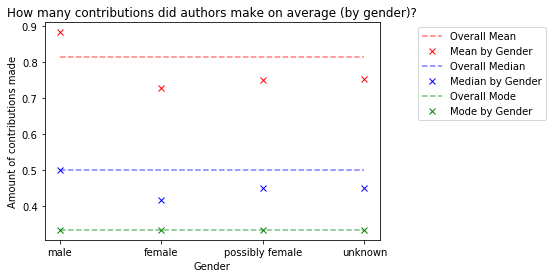

In [260]:
# Visualize
plt_mean = plt.plot(['male', 'female', 'possibly female', 'unknown'], [n_contribs_mean, n_contribs_mean, n_contribs_mean, n_contribs_mean], 'r--', alpha=0.5, label='Overall Mean')
plt_g_mean = plt.plot(['male','female', 'possibly female', 'unknown'], [n_contribs_m_mean, n_contribs_f_mean, n_contribs_fmax_mean, n_contribs_u_mean], 'rx', label='Mean by Gender')

plt_median = plt.plot(['male', 'female', 'possibly female', 'unknown'],[n_contribs_median, n_contribs_median, n_contribs_median, n_contribs_median], 'b--', alpha=0.5, label='Overall Median')
plt_g_median = plt.plot(['male', 'female', 'possibly female', 'unknown'],[n_contribs_m_median, n_contribs_f_median, n_contribs_fmax_median, n_contribs_u_median], 'bx', label='Median by Gender')

plt_mode = plt.plot(['male', 'female', 'possibly female', 'unknown'],[n_contribs_mode, n_contribs_mode, n_contribs_mode, n_contribs_mode], 'g--', alpha=0.5, label='Overall Mode')
plt_g_mode = plt.plot(['male', 'female', 'possibly female', 'unknown'],[n_contribs_m_mode, n_contribs_f_mode, n_contribs_fmax_mode,n_contribs_u_mode], 'gx', label='Mode by Gender')


plt.xlabel('Gender')
plt.ylabel('Amount of contributions made')

plt.title("How many contributions did authors make on average (by gender)?")

plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()

In [ ]:
# >>> Evaluation
# Hypothesis 3 is correct. A male author is more productive than a female author.